In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import sklearn.metrics

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

Exploring data 

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df['customerID'].unique()
pd.get_dummies(df['customerID']).sum()

0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Length: 7043, dtype: int64

In [11]:
df['gender'].unique()
pd.get_dummies(df['gender']).sum()

Female    3488
Male      3555
dtype: int64

This is a object type categorical column with two values Male and Female.

In [13]:
df['SeniorCitizen'].unique()
pd.get_dummies(df['SeniorCitizen']).sum()

0    5901
1    1142
dtype: int64

In [14]:
df['Partner'].unique()
pd.get_dummies(df['Partner']).sum()

No     3641
Yes    3402
dtype: int64

In [15]:
df['Dependents'].unique()
pd.get_dummies(df['Dependents']).sum()

No     4933
Yes    2110
dtype: int64

In [17]:
df['PhoneService'].unique()
pd.get_dummies(df['PhoneService']).sum()

No      682
Yes    6361
dtype: int64

In [18]:
df['MultipleLines'].unique()
pd.get_dummies(df['MultipleLines']).sum()

No                  3390
No phone service     682
Yes                 2971
dtype: int64

In [19]:
df['InternetService'].unique()
pd.get_dummies(df['InternetService']).sum()

DSL            2421
Fiber optic    3096
No             1526
dtype: int64

In [20]:
df['OnlineSecurity'].unique()
pd.get_dummies(df['OnlineSecurity']).sum()

No                     3498
No internet service    1526
Yes                    2019
dtype: int64

In [23]:
df['OnlineBackup'].unique()
pd.get_dummies(df['OnlineBackup']).sum()

No                     3088
No internet service    1526
Yes                    2429
dtype: int64

In [24]:
df['DeviceProtection'].unique()
pd.get_dummies(df['DeviceProtection']).sum()

No                     3095
No internet service    1526
Yes                    2422
dtype: int64

In [25]:
df['TechSupport'].unique()
pd.get_dummies(df['TechSupport']).sum()

No                     3473
No internet service    1526
Yes                    2044
dtype: int64

In [26]:
df['StreamingTV'].unique()
pd.get_dummies(df['StreamingTV']).sum()

No                     2810
No internet service    1526
Yes                    2707
dtype: int64

In [27]:
df['StreamingMovies'].unique()
pd.get_dummies(df['StreamingMovies']).sum()

No                     2785
No internet service    1526
Yes                    2732
dtype: int64

In [28]:
df['Contract'].unique()
pd.get_dummies(df['Contract']).sum()

Month-to-month    3875
One year          1473
Two year          1695
dtype: int64

In [29]:
df['PaperlessBilling'].unique()
pd.get_dummies(df['PaperlessBilling']).sum()

No     2872
Yes    4171
dtype: int64

In [30]:
df['PaymentMethod'].unique()
pd.get_dummies(df['PaymentMethod']).sum()

Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
dtype: int64

In [33]:
df['Churn'].unique()
pd.get_dummies(df['Churn']).sum()

No     5174
Yes    1869
dtype: int64

Key obervations:
1) Target column need balancing.
2) There are multiple object type categorical columns needs encoding technique.
3) No null values present in dataset.
4) CustomerId is column with unique values and will not contribute in data analysis hence we can drop this column.

EDA

In [36]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Using label encoder to convert object type taret column into numeric column.

In [42]:
df['Churn'] = le.fit_transform(df['Churn'])
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

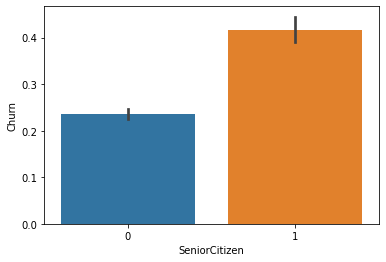

In [102]:
sns.barplot(x=df['SeniorCitizen'], y=df['Churn'])

<AxesSubplot:xlabel='Partner', ylabel='Churn'>

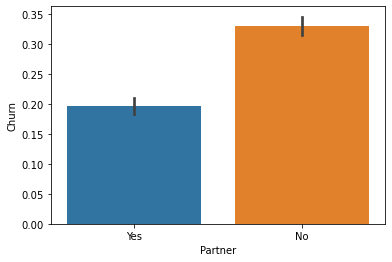

In [51]:
sns.barplot(x=df['Partner'], y=df['Churn'])

<AxesSubplot:xlabel='Dependents', ylabel='Churn'>

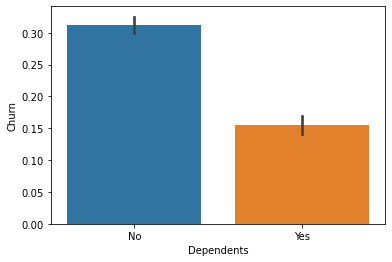

In [53]:
sns.barplot(x=df['Dependents'], y=df['Churn'])

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

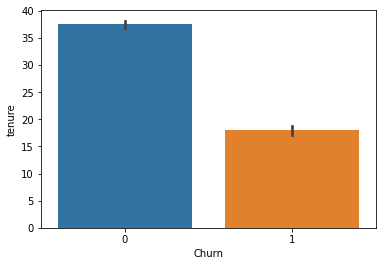

In [64]:
sns.barplot(x=df['Churn'], y=df['tenure'])

<AxesSubplot:xlabel='PhoneService', ylabel='Churn'>

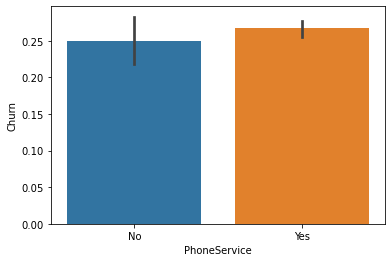

In [66]:
sns.barplot(x=df['PhoneService'], y=df['Churn'])

<AxesSubplot:xlabel='MultipleLines', ylabel='Churn'>

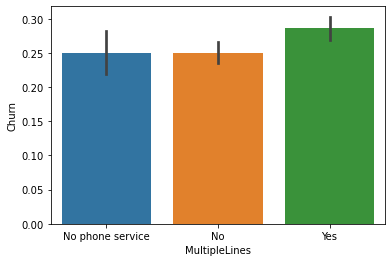

In [68]:
sns.barplot(x=df['MultipleLines'], y=df['Churn'])

<AxesSubplot:xlabel='InternetService', ylabel='Churn'>

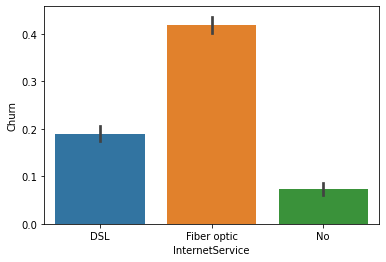

In [72]:
sns.barplot(x=df['InternetService'], y=df['Churn'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Churn'>

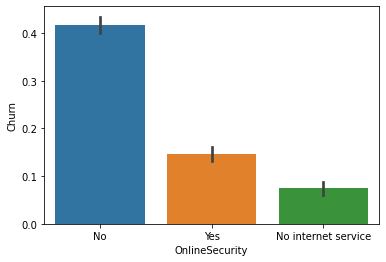

In [73]:
sns.barplot(x=df['OnlineSecurity'], y=df['Churn'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='Churn'>

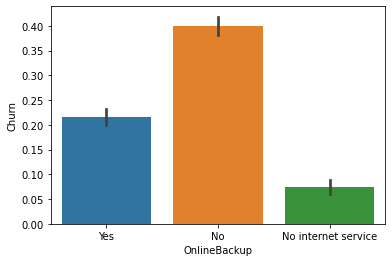

In [74]:
sns.barplot(x=df['OnlineBackup'], y=df['Churn'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='Churn'>

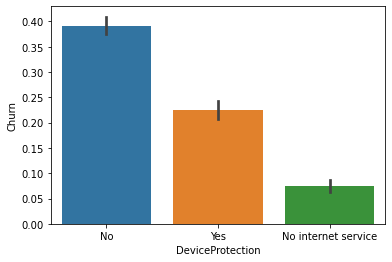

In [75]:
sns.barplot(x=df['DeviceProtection'], y=df['Churn'])

<AxesSubplot:xlabel='TechSupport', ylabel='Churn'>

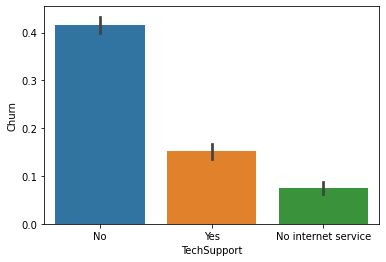

In [76]:
sns.barplot(x=df['TechSupport'], y=df['Churn'])

<AxesSubplot:xlabel='StreamingTV', ylabel='Churn'>

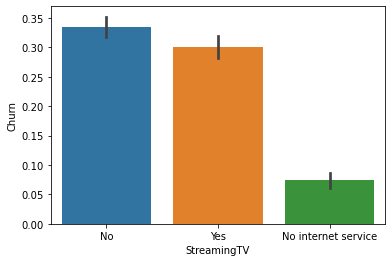

In [79]:
sns.barplot(x=df['StreamingTV'], y=df['Churn'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='Churn'>

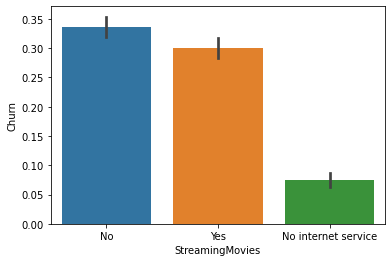

In [80]:
sns.barplot(x=df['StreamingMovies'], y=df['Churn'])

<AxesSubplot:xlabel='Contract', ylabel='Churn'>

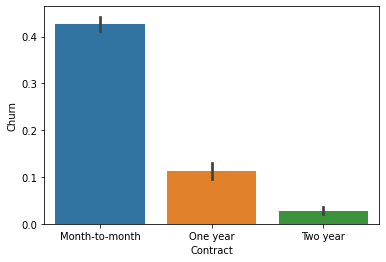

In [81]:
sns.barplot(x=df['Contract'], y=df['Churn'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Churn'>

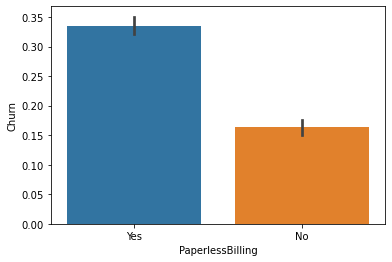

In [82]:
sns.barplot(x=df['PaperlessBilling'], y=df['Churn'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='Churn'>

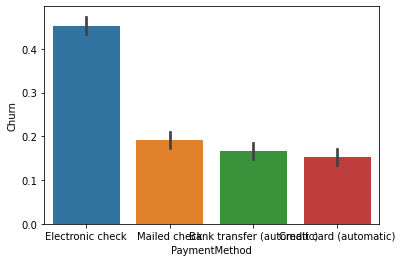

In [83]:
sns.barplot(x=df['PaymentMethod'], y=df['Churn'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

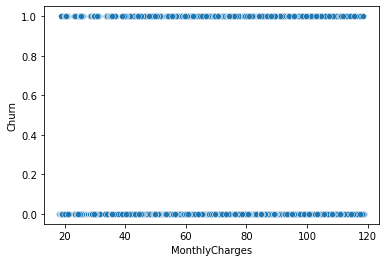

In [88]:
sns.scatterplot(x=df['MonthlyCharges'], y=df['Churn'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

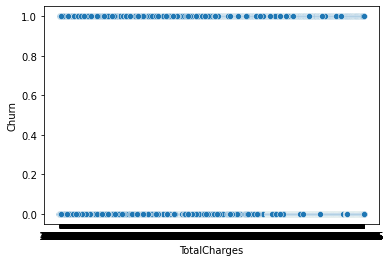

In [99]:
sns.scatterplot(x=df['TotalCharges'], y=df['Churn'])

Key observations:

1) customers without Online security has higher churning rate.
2) customers living with their partners have less churning compared to cutomers living without partners.
3) Cutomers having dependents have less churning compared to customers who doesnt have dependents.
4) customer churning is more for tenure bewteen  0 to 17.
5) phone service has not much impact on churning.
6) churning is higher in Fiber Optic InternetService compared to other options
7) churning is higher in cutomers without online backup.
8) Churning is higher where device protection is absent.
9) Churning is higher in case of tech support is unavailable.
10) Streaming Tv and streaming movies doesnt seem to have any significant impact on churning.
11) customers with Month-to-month contract seems to have higher churning.
12) Paperless billings are having more churning.
13) customers using Electronic check payment method are churning more compared to others.

In [109]:
df['TotalCharges'].astype('float')

ValueError: could not convert string to float: ''

Totalcharges have numbers in string format hence we tried converting strings into float, however we can see this column contains empty strings also(refer to above error).

In [160]:
l1 = [len(i.split()) for i in df['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',l2)

Index Positions with empty spaces :  [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


In [164]:
for i in l2:
    df.loc[i,'TotalCharges'] = df.loc[(i+1),'TotalCharges']

In [166]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

Encoding categorical columns

dropping customerID column.

In [168]:
df.drop(['customerID'],axis=1,inplace=True)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [170]:
encoding_Le = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
               "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

for cols in encoding_Le:
    df[cols]=le.fit_transform(df[cols])

In [172]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.864894,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.782978,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,399.800000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1396.250000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3793.050000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Checking Correlation

In [173]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.198890
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

MultipleLines,InternetService,StreamingMovies,StreamingTV,gender,PhoneService features are relatively less correlated w.r.t Churn.

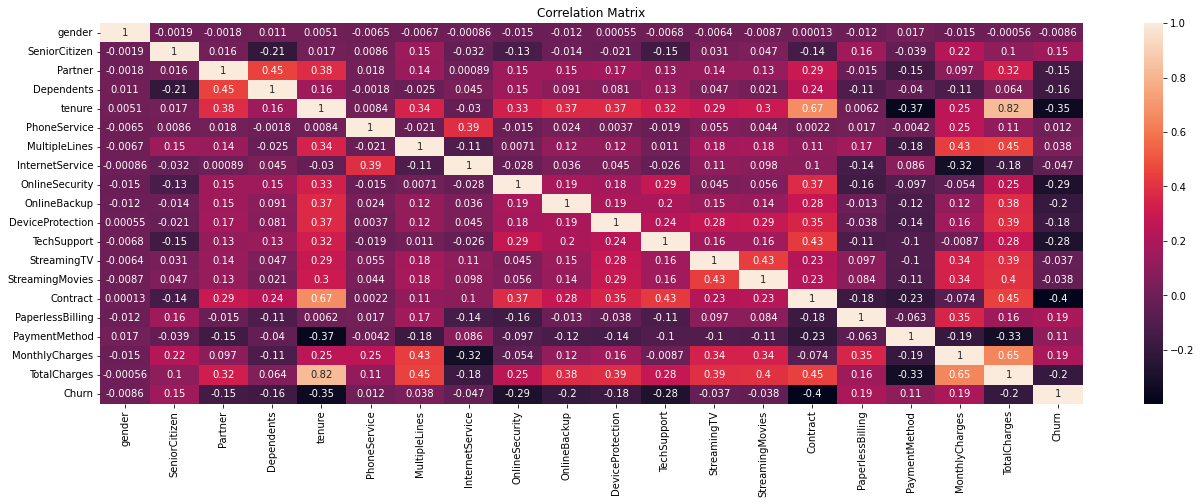

In [174]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

tenure and contract are highly negatively correlated and MOnthlyCHarges and paperlessbilling are highly positively correlated to Churn.

Checking multicollinearity

In [176]:
x1 = df.drop(['Churn'],axis=1)
y1 = df['Churn']

In [177]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x1)
X_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.99355554],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.17310557],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -0.95901074],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.85387632],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.87145755],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  2.01296688]])

In [178]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x1.columns

vif

,vif,Features
0,1.001877,gender
1,1.149770,SeniorCitizen
2,1.461005,Partner
3,1.382417,Dependents
4,7.268728,tenure
5,1.622393,PhoneService
6,1.394300,MultipleLines
7,1.826831,InternetService
8,1.268027,OnlineSecurity
9,1.218819,OnlineBackup


Totalcharges and tenure seems to have multicollinearity however we will not eliminate any column as both are correlated to target feature.

Checking Skewness

In [179]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.961852
Churn               1.063031
dtype: float64

In [180]:
columns = ('SeniorCitizen','Dependents','PhoneService','Contract','TotalCharges')
for col in columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

Checking outliers

gender                 AxesSubplot(0.125,0.787927;0.227941x0.0920732)
SeniorCitizen       AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
Partner             AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
Dependents             AxesSubplot(0.125,0.677439;0.227941x0.0920732)
tenure              AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
PhoneService        AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
MultipleLines          AxesSubplot(0.125,0.566951;0.227941x0.0920732)
InternetService     AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
OnlineSecurity      AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
OnlineBackup           AxesSubplot(0.125,0.456463;0.227941x0.0920732)
DeviceProtection    AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
TechSupport         AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
StreamingTV            AxesSubplot(0.125,0.345976;0.227941x0.0920732)
StreamingMovies     AxesSubplot(0.398529,0.345976;0.227941x0.0920732)
Contract            

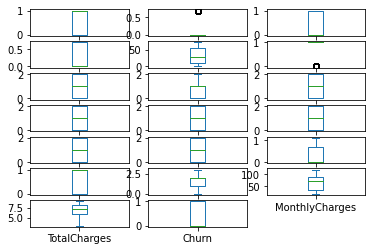

In [184]:
df.plot(kind='box',subplots=True,layout=(7,3))

In [185]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [186]:
df = df[(z<3).all(axis=1)]
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0.000000,0,0.000000,34,1,0,0,2,0,2,0,0,0,0.693147,0,3,56.95,7.544597,0
2,1,0.000000,0,0.000000,2,1,0,0,2,2,0,0,0,0,0.000000,1,3,53.85,4.692723,1
4,0,0.000000,0,0.000000,2,1,0,1,0,0,0,0,0,0,0.000000,1,2,70.70,5.028148,1
5,0,0.000000,0,0.000000,8,1,2,1,0,0,2,0,2,2,0.000000,1,2,99.65,6.711132,1
6,1,0.000000,0,0.693147,22,1,2,1,0,2,0,0,2,0,0.000000,1,1,89.10,7.575790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0.000000,0,0.000000,72,1,0,2,1,1,1,1,1,1,1.098612,1,0,21.15,7.258694,0
7038,1,0.000000,1,0.693147,24,1,2,0,2,0,2,2,2,2,0.693147,1,3,84.80,7.596643,0
7039,0,0.000000,1,0.693147,72,1,2,1,0,2,2,0,2,2,0.693147,1,1,103.20,8.904345,0
7041,1,0.693147,1,0.000000,4,1,2,1,0,0,0,0,0,0,0.000000,1,3,74.40,5.728800,1


In [188]:
df.shape

(6361, 20)

%Percentage data loss

In [189]:
Data_loss=((7043-6361)/7043)*100
Data_loss

9.683373562402386

Balancing Target column - Churn

!pip install -U imbalanced.learn

In [191]:
from imblearn.over_sampling import SMOTE

In [193]:
smt = SMOTE()
trainx,trainy=smt.fit_resample(x1,y1)

In [194]:
trainx.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
1       0              0        0           1       1             0              1                0               0             0                 0            0            0                0         1                 2              69.350000       69.350000       4
0       0              0        0           1       1             0              2                1               1             1                 1            1            1                0         0                 3              20.900000       20.900000       4
1       0              0        0           1       1             0              0                0               0             0                 0            0            0                0         1       

In [196]:
trainy.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [203]:
model = [DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        accu_Score = accuracy_score(y_test,prediction)
        print("Accuracy score for random state: ", i, " is ",accu_Score)
print()
print()
print()
print()
print()

Accuracy score for random state:  0  is  0.7853587115666179
Accuracy score for random state:  0  is  0.6298682284040995
Accuracy score for random state:  0  is  0.8407027818448023
Accuracy score for random state:  0  is  0.7654465592972182
Accuracy score for random state:  0  is  0.7970717423133236
Accuracy score for random state:  1  is  0.7938506588579795
Accuracy score for random state:  1  is  0.6585651537335285
Accuracy score for random state:  1  is  0.8448023426061494
Accuracy score for random state:  1  is  0.7592972181551977
Accuracy score for random state:  1  is  0.7970717423133236
Accuracy score for random state:  2  is  0.7994143484626647
Accuracy score for random state:  2  is  0.6541727672035139
Accuracy score for random state:  2  is  0.8392386530014642
Accuracy score for random state:  2  is  0.7674963396778917
Accuracy score for random state:  2  is  0.8020497803806735
Accuracy score for random state:  3  is  0.7909224011713031
Accuracy score for random state:  3  is 

We can observe the highest accuracy Score:0.852415812591508 is at random state 4 and for model: RandomForestClassifier.

Parameter Tunning

In [198]:
x1_train,x1_test,y1_train,y1_test = train_test_split(trainx,trainy,test_size=0.33,random_state=4)
rfc = RandomForestClassifier()
parameters={'max_features': ['auto','sqrt']}
gridsearch =GridSearchCV(rfc,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'max_features': 'auto'}

In [199]:
Rfc = RandomForestClassifier(max_features='auto')
Rfc.fit(x_train,y_train)
predictions = Rfc.predict(x_test)
AccScore = accuracy_score(y_test,predictions)
print("Accuracy Score is: ",AccScore)

Accuracy Score is:  0.8433382137628112


In [201]:
score = cross_val_score(Rfc,x1,y1,cv=5)

In [202]:
print("Croos Val Score: ",score)
print("Mean Score: ",score.mean())
print("std Score: ",score.std())

Croos Val Score:  [0.7920511  0.78992193 0.77288857 0.80113636 0.79545455]
Mean Score:  0.7902905026130718
std Score:  0.009490655688949079


0.8433773537403626

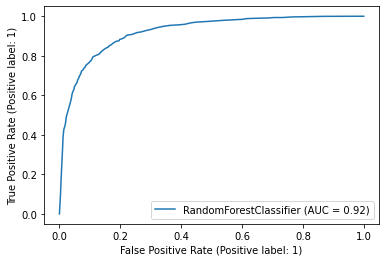

In [210]:
from sklearn import metrics
metrics.plot_roc_curve(Rfc, x_test, y_test)
metrics.roc_auc_score(y_test, predictions, average=None) 